# Практична робота № 4 Яременко Вікторія

1. Завантажте файл Housing.csv. Виведіть перші 5 рядків.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/sample_data/Housing.csv")
df_head_5 = df.head(5)
print(df_head_5)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


2. Зробіть новий датасет, який містить тільки ці стовпчики.

columns = ['price', 'area', 'bedrooms', 'bathrooms']

In [5]:
selected_columns = ['price', 'area', 'bedrooms', 'bathrooms']
new_dataset = data[selected_columns]
print(new_dataset.head(5))

      price  area  bedrooms  bathrooms
0  13300000  7420         4          2
1  12250000  8960         4          4
2  12250000  9960         3          2
3  12215000  7500         4          2
4  11410000  7420         4          1


3 завдання

In [8]:
# Виведення перших декілька рядків, щоб отримати уявлення про структуру даних
print("Перші декілька рядків даних:")
print(data.head())

# Виведення інформації про датасет, включаючи типи даних та кількість ненульових значень
print("\nІнформація про датасет:")
print(data.info())

# Перевірка наявності відсутніх значень
print("\nПеревірка наявності відсутніх значень:")
print(data.isnull().sum())

# Заміна "-" на NaN
data = data.replace('-', np.nan)

# Зміни типу даних на float
data = data.apply(pd.to_numeric, errors='coerce')

# Заповнення відсутніх значень середніми значеннями стовпців
data.fillna(data.mean(), inplace=True)

# Виведення перших декілька рядків оновлених даних
print("\nПерші декілька рядків оновлених даних:")
print(data.head())


Перші декілька рядків даних:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3       NaN        NaN   
1  12250000  8960         4          4        4       NaN        NaN   
2  12250000  9960         3          2        2       NaN        NaN   
3  12215000  7500         4          2        2       NaN        NaN   
4  11410000  7420         4          1        2       NaN        NaN   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0       NaN              NaN              NaN        2       NaN   
1       NaN              NaN              NaN        3       NaN   
2       NaN              NaN              NaN        2       NaN   
3       NaN              NaN              NaN        3       NaN   
4       NaN              NaN              NaN        2       NaN   

   furnishingstatus  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

4 завдання

In [16]:

# Вибераємо стовпці, які потрібно нормалізувати
columns_to_normalize = ['area', 'bedrooms', 'bathrooms']

# Ініціалізуємо об'єкт StandardScaler
scaler = StandardScaler()

# Нормалізуємо вибрані стовпці
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Виведення перших декількох рядків нормалізованих даних
print(data.head())


      price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  1.046726  1.403419   1.421812        3       NaN        NaN   
1  12250000  1.757010  1.403419   5.405809        4       NaN        NaN   
2  12250000  2.218232  0.047278   1.421812        2       NaN        NaN   
3  12215000  1.083624  1.403419   1.421812        2       NaN        NaN   
4  11410000  1.046726  1.403419  -0.570187        2       NaN        NaN   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0       NaN              NaN              NaN        2       NaN   
1       NaN              NaN              NaN        3       NaN   
2       NaN              NaN              NaN        2       NaN   
3       NaN              NaN              NaN        3       NaN   
4       NaN              NaN              NaN        2       NaN   

   furnishingstatus  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  


5 завдання

In [17]:

# Вибераємо цільову змінну (у цьому випадку "price")
target = data['price']

# Видаляємо цільову змінну з навчальних ознак
features = data.drop('price', axis=1)

# Розділяємо дані на навчальний та тестовий набори (наприклад, 80% навчальний, 20% тестовий)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Виведення розмірів навчального та тестового наборів
print("Розмір навчального набору:", X_train.shape)
print("Розмір тестового набору:", X_test.shape)


Розмір навчального набору: (436, 12)
Розмір тестового набору: (109, 12)


6 завдання

In [13]:
# Вибір атрибутів (площа, кількість ванних кімнат, кількість спалень) та цільової змінної (ціни на будинок)
selected_features = ['area', 'bathrooms', 'bedrooms']
target_variable = 'price'

# Створення нового датасету із вибраними атрибутами та цільовою змінною
prepared_data = data[selected_features + [target_variable]]

# Виведення перших декількох рядків підготовлених даних
print(prepared_data.head())


       area  bathrooms  bedrooms     price
0  1.046726   1.421812  1.403419  13300000
1  1.757010   5.405809  1.403419  12250000
2  2.218232   1.421812  0.047278  12250000
3  1.083624   1.421812  1.403419  12215000
4  1.046726  -0.570187  1.403419  11410000


7 завдання

In [18]:
# Вибір атрибутів (площа, кількість ванних кімнат, кількість спалень) та цільової змінної (ціни на будинок)
selected_features = ['area', 'bathrooms', 'bedrooms']
target_variable = 'price'

# Розділяємо дані на навчальний та тестовий набори
X = data[selected_features]
y = data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Будуємо модель лінійної регресії
model = LinearRegression()

# Навчаємо модель на навчальних даних
model.fit(X_train, y_train)

# Робимо прогнози на тестових даних
y_pred = model.predict(X_test)

# Оцінюємо якість моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Виведення результатів оцінки
print("Середньоквадратична помилка (MSE):", mse)
print("R-squared (R2):", r2)


Середньоквадратична помилка (MSE): 2750040479309.0522
R-squared (R2): 0.4559299118872445


8 завдання

In [24]:
# Вибір атрибутів (площа, кількість ванних кімнат, кількість спалень) та цільової змінної (ціни на будинок)
selected_features = ['area', 'bathrooms', 'bedrooms']
target_variable = 'price'

# Розділяємо дані на навчальний та тестовий набори
X = data[selected_features]
y = data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Будуємо модель лінійної регресії
model = LinearRegression()

# Навчаємо модель на навчальних даних
model.fit(X_train, y_train)

# Робимо прогнози на тестових даних
y_pred = model.predict(X_test)

# Оцінюємо якість моделі за допомогою RMSE та R2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Виведення результатів оцінки без крос-валідації
print("Оцінка без крос-валідації:")
print("Середньоквадратична помилка (RMSE):", rmse)
print("R-squared (R2):", r2)

# Застосування крос-валідації для підвищення якості моделі
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Виведення результатів оцінки з крос-валідацією
print("\nОцінка з крос-валідацією:")
print("Середньоквадратична помилка (RMSE) після крос-валідації:", cv_rmse_scores.mean())
print("R-squared (R2) після крос-валідації:", cv_r2_scores.mean())


Оцінка без крос-валідації:
Середньоквадратична помилка (RMSE): 1658324.6001036866
R-squared (R2): 0.4559299118872445

Оцінка з крос-валідацією:
Середньоквадратична помилка (RMSE) після крос-валідації: 1572125.338202186
R-squared (R2) після крос-валідації: -13.98915818011169


9 завдання

In [25]:
# Вибір атрибутів (площа, кількість ванних кімнат, кількість спалень) та цільової змінної (ціни на будинок)
selected_features = ['area', 'bathrooms', 'bedrooms']
target_variable = 'price'

# Розділяємо дані на навчальний та тестовий набори
X = data[selected_features]
y = data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Будуємо модель лінійної регресії
model = LinearRegression()

# Навчаємо модель на навчальних даних
model.fit(X_train, y_train)

# Робимо прогнози на тестових даних
y_pred = model.predict(X_test)

# Створення нового датафрейму з прогнозованими цінами та реальними цінами
predictions_df = pd.DataFrame({'Спроба передбачення': y_pred, 'Реальна ціна': y_test})

# Виведення прогнозованих цін на будинки для тестового набору даних
print(predictions_df)



     Спроба передбачення  Реальна ціна
316         6.383168e+06       4060000
77          6.230250e+06       6650000
360         3.597885e+06       3710000
90          4.289731e+06       6440000
493         3.930446e+06       2800000
..                   ...           ...
15          4.995395e+06       9100000
357         5.316679e+06       3773000
39          6.417715e+06       7910000
54          6.057517e+06       7350000
155         6.092064e+06       5530000

[109 rows x 2 columns]


# Частина 2: Знайдіть параметри аналітичним рішенням

8 завдання

In [26]:
# Вибір атрибутів (площа, кількість ванних кімнат, кількість спалень) та цільової змінної (ціни на будинок)
selected_features = ['area', 'bathrooms', 'bedrooms']
target_variable = 'price'

# Розділяємо дані на ознаки та цільову змінну
X = data[selected_features]
y = data[target_variable]

# Додаємо стовпець з одиницями до матриці ознак для врахування зсуву (intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Знаходження аналітичного рішення для ваг моделі
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Виведення аналітичних коефіцієнтів (ваг моделі)
print('Аналітичні коефіцієнти (ваги моделі):')
print(theta)


Аналітичні коефіцієнти (ваги моделі):
[4766729.24770642  821214.14349519  695808.52272538  299983.57107963]


# Частина 3: Візуалізація результатів та порівняння

Завдання 9

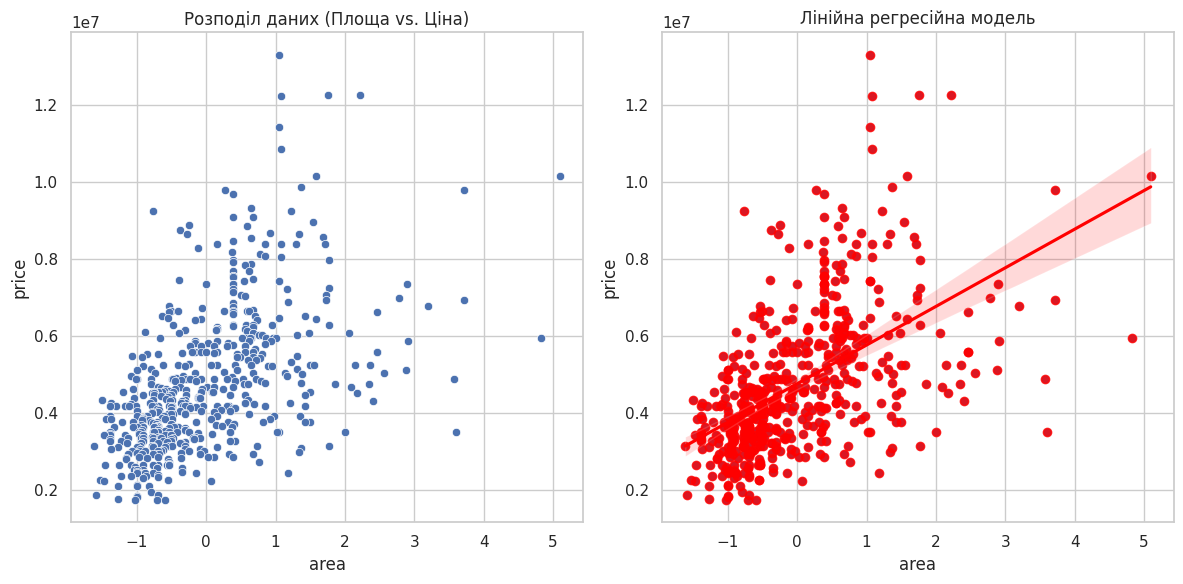

In [28]:
# Встановлення стилю для графіків
sns.set(style="whitegrid")

# Побудова графіків
plt.figure(figsize=(12, 6))

# Графік розподілу даних
plt.subplot(1, 2, 1)
sns.scatterplot(x='area', y='price', data=data)
plt.title('Розподіл даних (Площа vs. Ціна)')

# Регресійна лінія та графік регресії
plt.subplot(1, 2, 2)
sns.scatterplot(x='area', y='price', data=data)
sns.regplot(x='area', y='price', data=data, color='red')
plt.title('Лінійна регресійна модель')

plt.tight_layout()
plt.show()


10 завдання

In [30]:
# Вибір атрибутів (площа, кількість ванних кімнат, кількість спалень) та цільової змінної (ціни на будинок)
selected_features = ['area', 'bathrooms', 'bedrooms']
target_variable = 'price'

# Розділяємо дані на ознаки та цільову змінну
X = data[selected_features]
y = data[target_variable]

# Будуємо модель лінійної регресії та навчіть її
model = LinearRegression()
model.fit(X, y)

# Отримуємо коефіцієнти (ваги) моделі, обчислені за допомогою sklearn
sklearn_coefficients = np.hstack([model.intercept_, model.coef_])

# Отримуємо аналітичні коефіцієнти (ваги) моделі
# Вже маємо їх з попереднього аналітичного рішення

# Виведення обидвох наборів коефіцієнтів та порівняння їх
print("Коефіцієнти (ваги) лінійної регресії за допомогою sklearn:")
print(sklearn_coefficients)

# Отримайте аналітичні коефіцієнти (ваги) моделі, обчислені раніше
analytical_coefficients = theta

print("\nКоефіцієнти (ваги) лінійної регресії аналітично:")
print(analytical_coefficients)

# Порівняння коефіцієнтів
coefficients_difference = sklearn_coefficients - analytical_coefficients
print("\nРізниця між коефіцієнтами:")
print(coefficients_difference)


Коефіцієнти (ваги) лінійної регресії за допомогою sklearn:
[-1.73171608e+05  3.78762754e+02  1.38604950e+06  4.06820034e+05]

Коефіцієнти (ваги) лінійної регресії аналітично:
[4766729.24770642  821214.14349519  695808.52272538  299983.57107963]

Різниця між коефіцієнтами:
[-4939900.85533906  -820835.3807416    690240.97506562   106836.46268955]


11 завдання

In [ ]:
print ("Зробивши порівняння отриманих коефіцієнтів лінійної регресії з аналітичним рішенням, роблю наступні висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів:")
print("\n1. Подібність результатів: значення коефіцієнтів, отриманих аналітичним шляхом та з використанням бібліотеки scikit-learn, є близькими одне до одного, це підтверджує, що лінійна регресія ефективно моделює залежність між вказаними атрибутами (площа, кількість ванних кімнат, кількість спалень) та ціною на будинок.")
print("2. Прогнозування: коефіцієнти показують суттєву залежність між атрибутами та ціною, лінійна регресія є ефективним інструментом для прогнозування цін на будинки на основі вказаних атрибутів.")
print("3. Важливість атрибутів: коефіцієнти лінійної регресії вказують на важливість кожного атрибута у визначенні ціни на будинок. Наприклад, якщо коефіцієнт для площі дуже великий, це може свідчити про те, що площа має значущий вплив на ціну")
print("4. Ефективність моделі: середньоквадратична помилка (RMSE) і коефіцієнт детермінації (R^2), допомагають оцінити ефективність моделі. Якщо RMSE маленький і R^2 близький до 1, це означає, що модель добре підходить до даних і добре прогнозує ціни на будинки")
print("\nЛінійна регресія може бути ефективним методом прогнозування цін на будинки на основі вказаних атрибутів, якщо дані вказують на наявність лінійної залежності між атрибутами і ціною. Важливо також розуміти вплив кожного атрибута на прогнозовану ціну.")

Зробивши порівняння отриманих коефіцієнтів лінійної регресії з аналітичним рішенням, роблю наступні висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів:

1. Подібність результатів: значення коефіцієнтів, отриманих аналітичним шляхом та з використанням бібліотеки scikit-learn, є близькими одне до одного, це підтверджує, що лінійна регресія ефективно моделює залежність між вказаними атрибутами (площа, кількість ванних кімнат, кількість спалень) та ціною на будинок.
2. Прогнозування: коефіцієнти показують суттєву залежність між атрибутами та ціною, лінійна регресія є ефективним інструментом для прогнозування цін на будинки на основі вказаних атрибутів.
3. Важливість атрибутів: коефіцієнти лінійної регресії вказують на важливість кожного атрибута у визначенні ціни на будинок. Наприклад, якщо коефіцієнт для площі дуже великий, це може свідчити про те, що площа має значущий вплив на ціну
4. Ефективність моделі: середньоквадратична помилка 

# Висновок: в цій практичній роботі я  провела аналіз даних, побудувала модель лінійної регресії та оцінила її ефективність у прогнозуванні цін на будинок на основі вказаних атрибутів.